## A6.4 Supervised Machine Learning - Regression
### The following script contains the following:

#### 1. Import data, libraries, additional requirements
#### 2. Data consistency checks
#### 3. Data prep for regression analysis
#### 4. Regression Analysis
--------------------------------------------------
### 1. Import libraries, additional requirements and data


In [1]:
# Import data libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display visualizations in the notebook without the need to "call" them specifically
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

In [3]:
#  Create/save project folder path
path = r"Boat Sales Analysis"

# Read data (csv file)
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_sales_final.csv'), encoding='ISO-8859-1', index_col=False)

---------------------------------------------------------------------------------------------------------------------------
### 2. Data consistency checks

In [4]:
df.columns

Index(['Unnamed: 0', 'Category', 'Manufacturer', 'Specifications',
       'Year Built', 'Year Built Condition', 'Length', 'Length Condition',
       'Width', 'Width Condition', 'Material', 'Price', 'Price Condition',
       'Currency', 'Country', 'State/Region', 'Location', '# Views',
       'Views Condition'],
      dtype='object')

In [5]:
# Drop redundant column
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df.shape

(9888, 18)

In [7]:
df.head()

,Category,Manufacturer,Specifications,Year Built,Year Built Condition,Length,Length Condition,Width,Width Condition,Material,Price,Price Condition,Currency,Country,State/Region,Location,# Views,Views Condition
0,Motor Yacht,Bayliner Power Boats,"Used Boat, Unleaded",1992.0,Old,7.70,Medium,2.46,Narrow,Plastic,14900,Low-value product,CHF,Switzerland,Le Landeron,NaN,3263,High Views
1,Hardtop,Princess Power Boats,"Used Boat, Diesel",1979.0,Old,11.12,Medium,3.88,Medium,GRP,35000,Low-value product,CHF,Switzerland,Neuenburgersee,Hauterive,2432,High Views
2,Bowrider,Windy Power Boats,"Used Boat, Diesel",2002.0,Mid,12.35,Medium,3.48,Medium,GRP,125900,Mid-value product,CHF,Switzerland,Lago Maggiore,6600 Locarno,2261,High Views
3,Hardtop,Pershing Power Boats,"Used Boat, Diesel",2009.0,Mid,20.30,Long,5.20,Wide,GRP,949000,High-value product,EUR,Germany,Baltic Sea,Neustadt In Holstein,2154,High Views
4,Sport Boat,Sea Ray Power Boats,"Used Boat, Unleaded",1993.0,Old,6.14,Short,2.34,Narrow,Plastic,19900,Low-value product,CHF,Switzerland,Murtensee,Avenches,2026,High Views


In [8]:
# Check for missing values
df.isnull().sum()

Category                2626
Manufacturer            1334
Specifications             6
Year Built               551
Year Built Condition     551
Length                     9
Length Condition           9
Width                     56
Width Condition           56
Material                1749
Price                      0
Price Condition            0
Currency                   0
Country                   33
State/Region            1061
Location                5665
# Views                    0
Views Condition            0
dtype: int64

Notes: Nulls as expected, nulls kept instead of removing, as there can be a loss in valuable data points.

In [9]:
# Check for duplicates
df_dups = df[df.duplicated()] #no duplicates

In [10]:
# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

df.describe()

,Year Built,Length,Width,Price,# Views
count,9337.00,9879.00,9832.00,9888.00,9888.00
mean,2004.91,11.57,3.52,320137.34,149.16
std,16.36,6.00,1.22,1007482.24,151.81
min,1885.00,1.04,0.01,3300.00,13.00
25%,1999.00,7.47,2.54,44000.00,70.00
50%,2008.00,10.28,3.33,95000.00,108.00
75%,2018.00,13.93,4.25,255000.00,172.00
max,2021.00,100.00,25.16,31000000.00,3263.00


In [11]:
# Impute mean value of year for missing variables in 'Year Built' column as 5.57% Nans are relatively low and do not want to lose valuable information by removing Nans.
mean_value = np.round(df['Year Built'].mean())

# Fill missing values with the rounded mean
df['Year Built'].fillna(mean_value, inplace=True)

In [12]:
df['Year Built'].value_counts(dropna=False)

Year Built
2020.00    1279
2005.00     858
2019.00     663
2008.00     457
2007.00     393
           ... 
1885.00       1
1935.00       1
1941.00       1
1917.00       1
1898.00       1
Name: count, Length: 121, dtype: int64

---------------------------------------------------------------------------------------------------------------------------
### 3. Data prep for regression analysis

Text(0, 0.5, '# of Views')

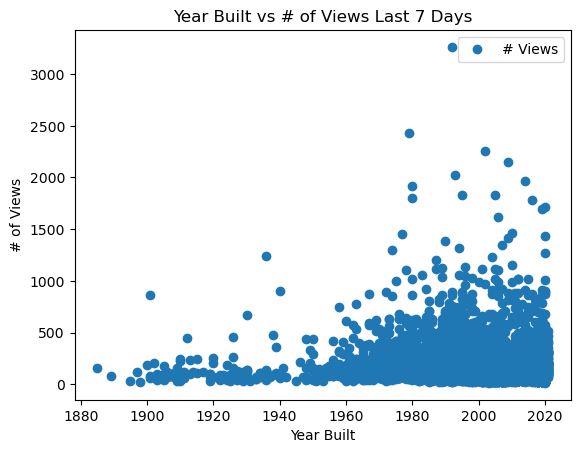

In [13]:
# Create a scatterplot to revisit how the chosen variables for your hypothesis plot against each other
df.plot(x = 'Year Built', y='# Views',style='o') # The style option creates a scatterplot; without it, we only have lines
plt.title('Year Built vs # of Views Last 7 Days')  
plt.xlabel('Year Built')  
plt.ylabel('# of Views')

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['Year Built'].values.reshape(-1,1)
y = df['# Views'].values.reshape(-1,1)

In [15]:
X

array([[1992.],
       [1979.],
       [2002.],
       ...,
       [2020.],
       [2020.],
       [2003.]])

In [16]:
y

array([[3263],
       [2432],
       [2261],
       ...,
       [  18],
       [  15],
       [  13]], dtype=int64)

In [17]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

---------------------------------------------------------------------------------------------------------------------------
### 4. Regression Analysis

In [18]:
# Create a regression object
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

# Import models that support missing values.
#from sklearn.ensemble import HistGradientBoostingRegressor

#regression = HistGradientBoostingRegressor() # Used instead, in order to preserve nan values/multiple regressions

In [19]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

Text(0, 0.5, '# of Views Last 7 Days')

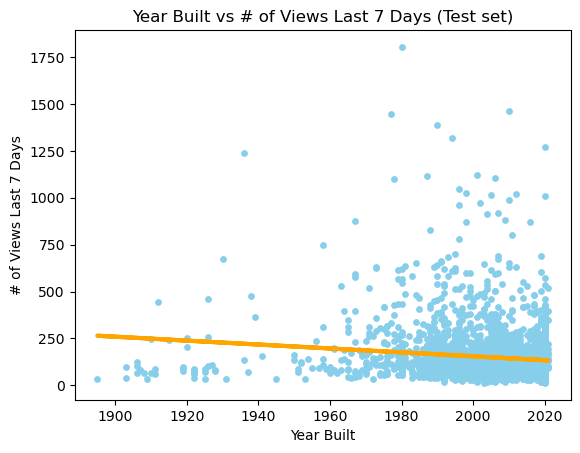

In [21]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='skyblue', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Year Built vs # of Views Last 7 Days (Test set)')
plot_test.xlabel('Year Built')
plot_test.ylabel('# of Views Last 7 Days')

In [22]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.04456663]]
Mean squared error:  20086.42387921769
R2 score:  0.016719434451515025


In [24]:
y_predicted

array([[146.58055071],
       [138.22401766],
       [138.22401766],
       ...,
       [193.58604913],
       [136.1348844 ],
       [134.04575113]])

In [25]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,37,146.58
1,116,138.22
2,137,138.22
3,80,153.89
4,115,136.13
5,117,136.13
6,86,154.94
7,58,154.94
8,122,149.71
9,75,134.05


##### Compare how the regression fits the training set

In [26]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.04456663]]
Mean squared error:  23898.9578071949
R2 score:  0.011069702407598525


Text(0, 0.5, '# of Views Last 7 Days')

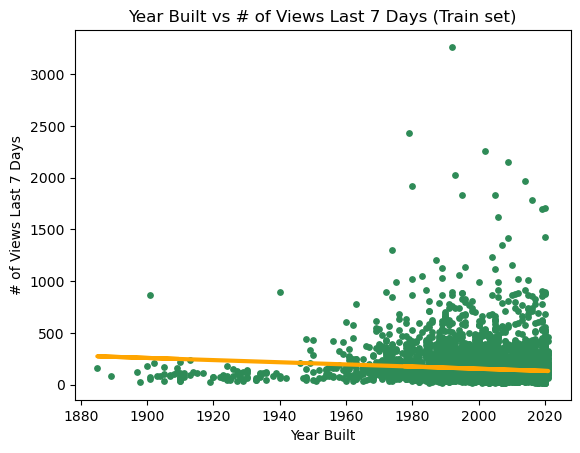

In [29]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='seagreen', s = 15)
plot_test.plot(X_train, y_predicted_train, color='orange', linewidth =3)
plot_test.title('Year Built vs # of Views Last 7 Days (Train set)')
plot_test.xlabel('Year Built')
plot_test.ylabel('# of Views Last 7 Days')

### Model Summary:
- Slope: -1.0446
- Indicates a negative relationship between the independent and dependent variables.

#### Mean Squared Error (MSE):
- MSE1: 20086.42
- MSE2: 23898.96
- High MSE suggests significant prediction errors compared to actual values.

#### R-squared (R2) Score:
- R21: 0.0167
- R22: 0.0111
- Low R2 scores indicate limited explanatory power of the model.

#### Interpretation:
- The linear regression model struggles to predict the dependent variable accurately.
- Negative slope suggests a negative relationship.
- Low R2 scores and high MSE indicate room for improvement in model performance.

#### Recommendations:
- Consider model refinement, or exploring alternative models for improved accuracy.


### Limitations and Potential Data Bias:
1. The number of views data can be influenced by various factors in this dataset, such as price and year built, though not directly. This suggests that website views may be influenced by factors beyond this dataset, such as how the website displays its yacht and boat selling posts to consumers, time of day online, and season of year. This implies a broader range of influences on the number of views.

2. Potential biases in the dataset include human error, missing variables, imputation of missing variables, and the removal of extreme values. Dealing with NaN values in this dataset was challenging to avoid introducing additional bias to the analysis.

3. Extreme values were not removed.